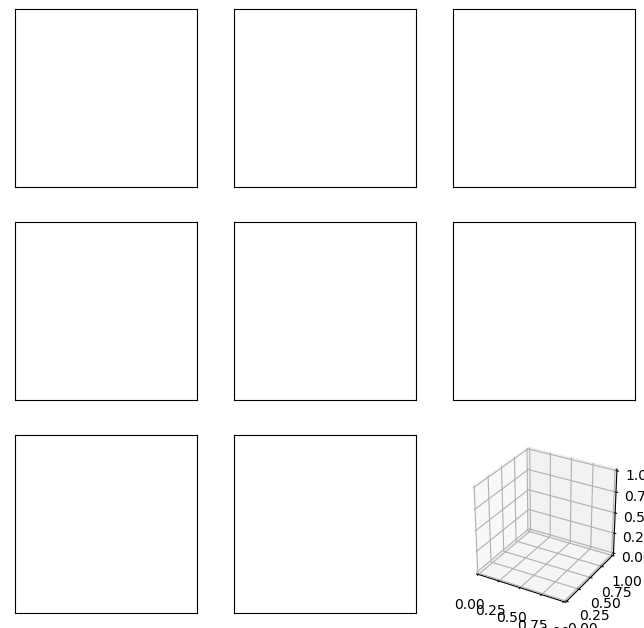

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon

plt.rcParams['figure.dpi'] = 100

def clip_path(ax):
    T1 = [(0,0),(0,1),(1,1)]
    T2 = [(0,0),(1,0),(1,1)]
    clip1 = Polygon(T1, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')
    clip2 = Polygon(T2, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')

    line = Line2D([0, 1], [0, 1], transform=ax.transAxes, linewidth=0.5,
                  color="black", clip_on=False, zorder=50)
    ax.add_artist(line)

    return clip1, clip2

    
def scatter(ax):
    np.random.seed(123)
    n = 500
    X = np.random.normal(0, 0.5, n)
    Y = np.random.normal(0, 0.5, n)
    S = 25

    clip1, clip2 = clip_path(ax)
    
    ax.scatter(X, Y, S, clip_path=clip1,
               linewidth=0.75, facecolor="None",  edgecolor=".25")
    ax.scatter(X, Y, S, clip_path=clip1,
               linewidth=0.00, facecolor="white", edgecolor="None")
    ax.scatter(X, Y, S/2, clip_path=clip1,
               linewidth=0.00, facecolor="black", edgecolor="None", alpha=0.5)

    ax.scatter(X, Y, S, clip_path=clip2,
               linewidth=0.75, facecolor="None",  edgecolor=".25")
    ax.scatter(X, Y, S, clip_path=clip2,
               linewidth=0.00, facecolor="white", edgecolor="None")
    ax.scatter(X, Y, S/2, clip_path=clip2,
               linewidth=0.00, facecolor="red", edgecolor="None", alpha=0.5)

    ax.set_xlabel("Scatter plot")
    

def lineplot(ax):
    ax.set_xlabel("Line plot")

    clip1, clip2 = clip_path(ax)
    
    X = np.linspace(-1,1,100)
    Y = 0.25*np.cos(1+np.pi*X)
    ax.plot(X, Y, color="black", linewidth=2, clip_path=clip1)
    ax.fill_between(X, Y+0.25, Y-0.25, clip_path=clip1,
                    facecolor="black", edgecolor="None", alpha=0.15)

    X = np.linspace(-1,1,100)
    Y = 0.25*np.cos(1+np.pi*X)
    ax.plot(X, Y, color="red", linewidth=2, clip_path=clip2)
    ax.fill_between(X, Y+0.25, Y-0.25, clip_path=clip2,
                    facecolor="red", edgecolor="None", alpha=0.15)
    

def quiverplot(ax):
    clip1, clip2 = clip_path(ax)
    
    n = 10
    X,Y = np.mgrid[0:n, 0:n]
    X,Y = 2*X/(n-1)-1, 2*Y/(n-1)-1
    T = np.arctan2(Y, X)
    U, V = np.cos(T), np.sin(T)
    ax.quiver(X, Y, 0.1*U, 0.1*V, scale=1, width=0.015, clip_path=clip1,
              edgecolor='black', facecolor='.9', linewidth=.5)

    ax.quiver(X, Y, 0.1*U, 0.1*V, T-1, scale=1, width=0.015, clip_path=clip2,
              edgecolor='black', linewidth=.5, cmap="hot")

    ax.set_xlabel("Quiver plot")

def contourplot(ax):

    clip1, clip2 = clip_path(ax)
    
    def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
    n = 100
    x = np.linspace(-3,3,n)
    y = np.linspace(-3,3,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)

    CF = ax.contourf(Z, 10, extent=[-1,+1,-1,+1], alpha=.5, 
                     origin="upper", cmap="gray", zorder=-10)
    for collection in CF.collections:
        collection.set_clip_path(clip1)
   
    CS = ax.contour(Z, 10, extent=[-1,+1,-1,+1], 
                    colors="black", linewidths=.5, origin="upper")
    for collection in CS.collections:
        collection.set_clip_path(clip1)

    CF = ax.contourf(Z, 10, extent=[-1,+1,-1,+1], alpha=.75, 
                     origin="upper", cmap="viridis", zorder=-10)
    for collection in CF.collections:
        collection.set_clip_path(clip2)
    
    CS = ax.contour(Z, 10, extent=[-1,+1,-1,+1], 
                    colors="white", linewidths=.5, origin="upper")
    for collection in CS.collections:
        collection.set_clip_path(clip2)

    ax.set_xlabel("Contour plot")

def imageplot(ax):
    def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
    n = 32
    x = np.linspace(-3,3,n)
    y = np.linspace(-3,3,n)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)

    clip1, clip2 = clip_path(ax)
    ax.imshow(Z, extent=[-1,+1,-1,+1], origin="upper", zorder=50,
              cmap="gray", interpolation="nearest", clip_path=clip1)
    ax.imshow(Z, extent=[-1,+1,-1,+1], origin="upper", 
              cmap="hot", interpolation="bicubic", clip_path=clip2)


    ax.set_xlabel("Image plot")

def pieplot(ax):
    clip1, clip2 = clip_path(ax)

    size = 0.3
    vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

    cmap = plt.get_cmap("gray")
    outer_colors = cmap(.1+np.arange(3)/4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10])/12)

    patches, _ = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path(clip1)
    patches, _ = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path (clip1)

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(+np.arange(3))
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
    patches, _ = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path(clip2)
    patches, _ = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
                        wedgeprops=dict(width=size, edgecolor='w'))
    for patch in patches:
        patch.set_clip_on(True)
        patch.set_clip_path (clip2)
    
    rect = Rectangle((0,0), 1, 1, transform=ax.transAxes, linewidth=0.75,
                     edgecolor="black", facecolor="None", clip_on=False)
    ax.add_artist(rect)

    ax.set_xlabel("Pie plot")

def threedplot(ax):

    T1 = [(0,0),(0,1),(1,1)]
    T2 = [(0,0),(1,0),(1,1)]
    clip1 = Polygon(T1, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')
    clip2 = Polygon(T2, closed=True, transform=ax.transAxes,
                   edgecolor='None', facecolor='None')

    ax.set_axis_off()
    ax.set_xlim(-1, 1), ax.set_ylim(-1, 1), ax.set_zlim(-2, 2)
    X,Y= np.meshgrid(np.linspace(-1, 1, 25),
                     np.linspace(-1, 1, 25))
    Z = np.sin(5*np.sqrt(X**2+Y**2))

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="gray", clip_path=clip1,
                    linewidth=.25, edgecolor="black", vmin=-1.5, vmax=1)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="magma", clip_path=clip2,
                    linewidth=0, edgecolor="black", vmin=-1.5, vmax=1)

    line = Line2D([0, 1], [0, 1], transform=ax.transAxes, linewidth=0.5,
                  color="black", clip_on=False, zorder=10)
    ax.add_artist(line)
    
    rect = Rectangle((0,0), 1, 1, transform=ax.transAxes, linewidth=0.75,
                     edgecolor="black", facecolor="None", clip_on=False)
    ax.add_artist(rect)
    text = Text(0.5, -0.025, "3D plot", clip_on=False,
                ha="center", va="top", transform=ax.transAxes)
    ax.add_artist(text)
    
    
def barplot(ax):
    clip1, clip2 = clip_path(ax)

    n = 16
    X = np.arange(n)
    Y1 = (1-0.25*X/n) * np.random.uniform(0.25, 0.75, n)
    Y2 = (1-0.25*X/n) * np.random.uniform(0.25, 0.75, n)
    ax.bar(X, +Y1, 1, facecolor='#cccccc', edgecolor='white', clip_path=clip1)
    ax.bar(X, -Y2, 1, facecolor='#999999', edgecolor='white', clip_path=clip1)
    ax.bar(X, +Y1, 1, facecolor='#ffaaaa', edgecolor='white', clip_path=clip2)
    ax.bar(X, -Y2, 1, facecolor='#ff7777', edgecolor='white', clip_path=clip2)
    ax.set_xlim(-1,n)
    ax.set_xlabel("Bar plot")

def boxplot(ax):
    clip1, clip2 = clip_path(ax)

    n = 5
    data = np.random.normal(0, .25, (100,n))

    bplots = ax.boxplot(data, patch_artist=True)
    for patch in bplots['boxes']:
        patch.set_facecolor("0.9")
    for line in bplots['medians']:
        line.set_color("black")
    for element in ["boxes","medians","whiskers", "caps", "fliers","means"]:
        for item in bplots[element]:
            item.set_clip_path(clip1)

    bplots = ax.boxplot(data, patch_artist=True)
    
    for patch in bplots['boxes']:
        patch.set_facecolor("0.9")
    for line in bplots['medians']:
        line.set_color("black")
    for element in ["boxes","medians","whiskers", "caps", "fliers","means"]:
        for item in bplots[element]:
            item.set_color("red")
            try:
                item.set_markerfacecolor ("red")
                item.set_markeredgecolor ("red")
            except:
                pass
            item.set_clip_path(clip2)

            
    ax.set_xlim(0,n+1), ax.set_xticks([])
    ax.set_xlabel("Box plot")


fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for ax in axes.ravel():
    ax.set(xticks=[], yticks=[], xlim=[-1,1], ylim=[-1,1])
axes[2,2] = plt.subplot(339, projection="3d")



In [5]:
lineplot(axes[0,0])
scatter(axes[0,1])
barplot(axes[0,2])

imageplot(axes[1,0])
contourplot(axes[1,1])
boxplot(axes[1,2])

quiverplot(axes[2,0])
pieplot(axes[2,1])
threedplot(axes[2,2])

plt.savefig("catalogue.pdf")
plt.show()

<Figure size 600x400 with 0 Axes>